In [58]:
pip install pandas seaborn matplotlib wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 1.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud

In [15]:
training_df = pd.read_csv("/Users/hannahdestiny/Desktop/FakeProfileDetection/dev/csv/structured_train.csv")
testing_df = pd.read_csv("/Users/hannahdestiny/Desktop/FakeProfileDetection/dev/csv/structured_test.csv")
pd.set_option('display.max_colwidth', None)


In [16]:
training_df.isna().sum()
testing_df.isna().sum()

screen_name     0
text            0
account.type    0
class_type      0
dtype: int64

<Axes: xlabel='account.type', ylabel='count'>

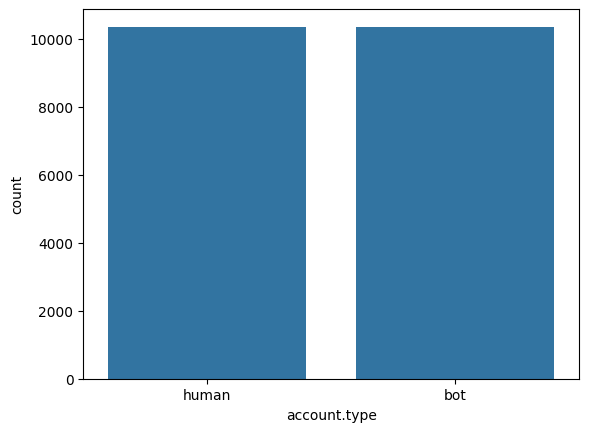

In [26]:
training_df.describe()
x = training_df['account.type'].value_counts()  
sns.barplot(x)


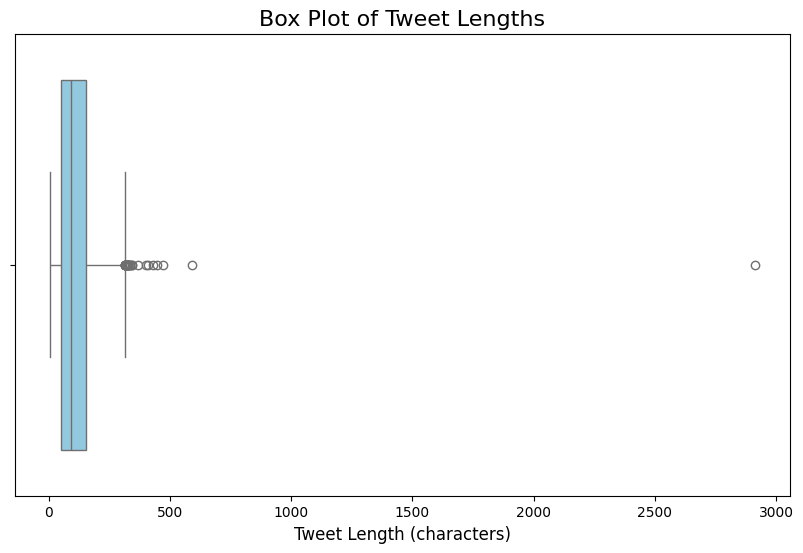

In [30]:
training_df['text.length'] = training_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x=training_df['text.length'], color='skyblue')
plt.title('Box Plot of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length (characters)', fontsize=12)
plt.show()

"""Most will have around 280 characters as that is the character limit for a tweet in 2024
However there are some outliers that have a tweet length of nearly 3000 characters as it is unicode form of 192 emojis"""

In [32]:
training_df_filtered = training_df[training_df['text.length'] <= 1000]
outliers = training_df[training_df['text.length'] > 1000]
outliers


screen_name  \
2516  ahadsheriff   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
2516  <U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF><U+0001F447><U+0001F3FF>\r\n<U+0001F449><U+0001F3FF><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F447><U+0001F3FE><U+0001F448><U+0001F3FF>\r\n<U+0001F449><U+0001F3FF><U+0001F449><U+0001F3FE><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F447><U+0001F3FD><U+0001F448><U+0001F3FE><U+0001F448><U+0001F3FF>\r\n<U+0001F449><U+0001F3FF><U+0001F449><U+0001F3FE><U+0001F449><U+0001F3FD><U+0001F447><U+0001F3FC><U+0001F447><U+0001F3FC><U+0001F447><U+0001F3FC><U+0001F447><U+0001F3FC><U+0001F447><U+0001F3FC><U+0001F448><U+0001

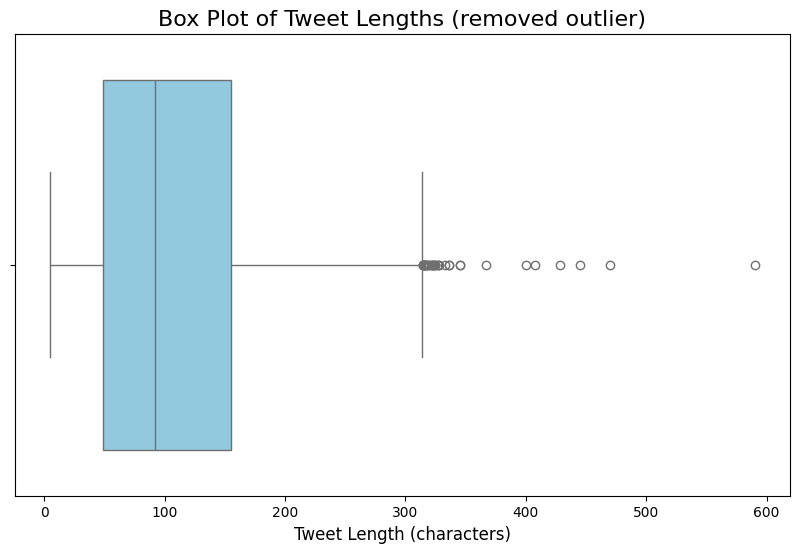

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=training_df_filtered['text.length'], color='skyblue')
plt.title('Box Plot of Tweet Lengths (removed major outlier)', fontsize=16)
plt.xlabel('Tweet Length (characters)', fontsize=12)
plt.show()

In [40]:
"""investigate the longer text lengths"""
Q1= training_df['text.length'].quantile(0.25)
Q3= training_df['text.length'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
training_df[training_df['text.length'] > upper_bound].count()

screen_name     34
text            34
account.type    34
class_type      34
text.length     34
dtype: int64

<Axes: xlabel='account.type', ylabel='count'>

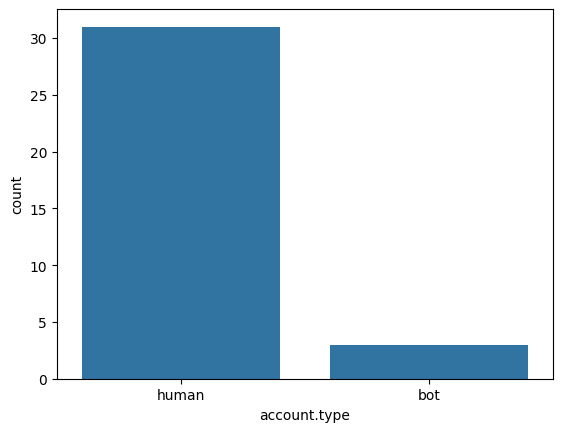

In [42]:
outliers_df = training_df[training_df['text.length'] > upper_bound]
o = outliers_df['account.type'].value_counts()  
sns.barplot(o)

In [54]:
outliers_df

screen_name  \
363       narendramodi   
1005        kevinhooke   
1227            zawvrk   
1486            zawvrk   
2436           imranye   
2516       ahadsheriff   
4418        kevinhooke   
4570     JustinTrudeau   
4763     JustinTrudeau   
5107             jaden   
5270          elonmusk   
6332    VitalikButerin   
6358    VitalikButerin   
6843            zawvrk   
6866      narendramodi   
7116     JustinTrudeau   
7436         dril_gpt2   
8223     JustinTrudeau   
9365      narendramodi   
12715         zawarbot   
12767       kevinhooke   
12846   VitalikButerin   
13148    JustinTrudeau   
13914     narendramodi   
14298    JustinTrudeau   
15718       kevinhooke   
15751   VitalikButerin   
15892     narendramodi   
16424    JustinTrudeau   
16817   VitalikButerin   
17841   VitalikButerin   
18269  realDonaldTrump   
18584       gpt2_trump   
19942    JustinTrudeau   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
363                                                                                                                                                          

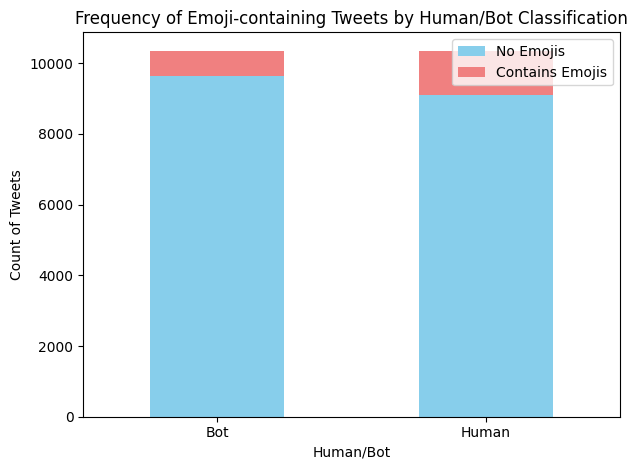

In [55]:
"""distribution of emojis """
def contains_emoji(text):
    # Detect if there are any '<U+XXXX>' style emojis in the text
    return bool(re.search(r'<U\+[0-9A-Fa-f]+>', text))

training_df['has_emoji'] = training_df['text'].apply(contains_emoji)
emoji_counts = training_df.groupby(['account.type', 'has_emoji']).size().unstack(fill_value=0)
emoji_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

plt.title('Frequency of Emoji-containing Tweets by Human/Bot Classification')
plt.xlabel('Human/Bot')
plt.ylabel('Count of Tweets')
plt.xticks([1, 0], ['Human', 'Bot'], rotation=0)
plt.legend(['No Emojis', 'Contains Emojis'])

plt.tight_layout()
plt.show()


/var/folders/zn/5y0cq15s21v4ssh3z5sg59340000gn/T/ipykernel_23701/4163318490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['has_emoji'] = outliers_df['text'].apply(contains_emoji)


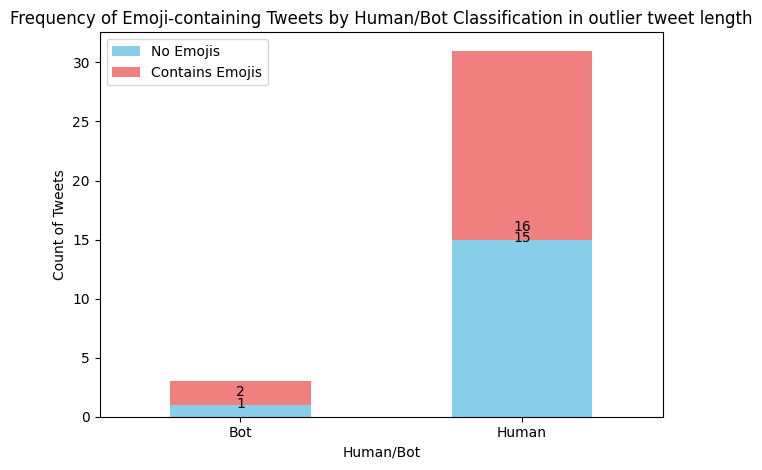

In [57]:
outliers_df['has_emoji'] = outliers_df['text'].apply(contains_emoji)
emoji_counts = outliers_df.groupby(['account.type', 'has_emoji']).size().unstack(fill_value=0)
ax = emoji_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

plt.title('Frequency of Emoji-containing Tweets by Human/Bot Classification in outlier tweet length')
plt.xlabel('Human/Bot')
plt.ylabel('Count of Tweets')
plt.xticks([1, 0], ['Human', 'Bot'], rotation=0)
plt.legend(['No Emojis', 'Contains Emojis'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),  # Position of text
                ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()


In [47]:
emoji_counts

has_emoji,False,True
account.type,,
bot,9638,716
human,9091,1267


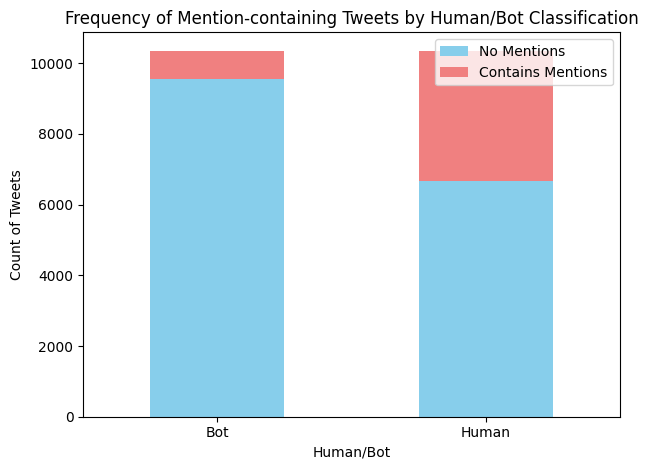

In [63]:
"""distribution of mentions """
def contains_mention(text):
    # Detect if there are any '@' mentions in the text
    return bool(re.search(r"@\w+", text))

training_df['has_mentions'] = training_df['text'].apply(contains_mention)
mention_counts = training_df.groupby(['account.type', 'has_mentions']).size().unstack(fill_value=0)
mention_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

plt.title('Frequency of Mention-containing Tweets by Human/Bot Classification')
plt.xlabel('Human/Bot')
plt.ylabel('Count of Tweets')
plt.xticks([1, 0], ['Human', 'Bot'], rotation=0)
plt.legend(['No Mentions', 'Contains Mentions'])

plt.tight_layout()
plt.show()

/var/folders/zn/5y0cq15s21v4ssh3z5sg59340000gn/T/ipykernel_23701/3991238977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['has_mentions'] = outliers_df['text'].apply(contains_mention)


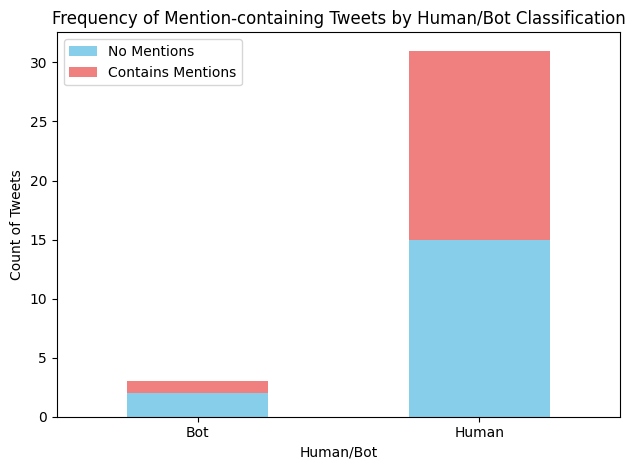

In [64]:
outliers_df['has_mentions'] = outliers_df['text'].apply(contains_mention)
mention_counts = outliers_df.groupby(['account.type', 'has_mentions']).size().unstack(fill_value=0)
mention_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Frequency of Mention-containing Tweets by Human/Bot Classification')
plt.xlabel('Human/Bot')
plt.ylabel('Count of Tweets')
plt.xticks([1, 0], ['Human', 'Bot'], rotation=0)
plt.legend(['No Mentions', 'Contains Mentions'])

plt.tight_layout()
plt.show()

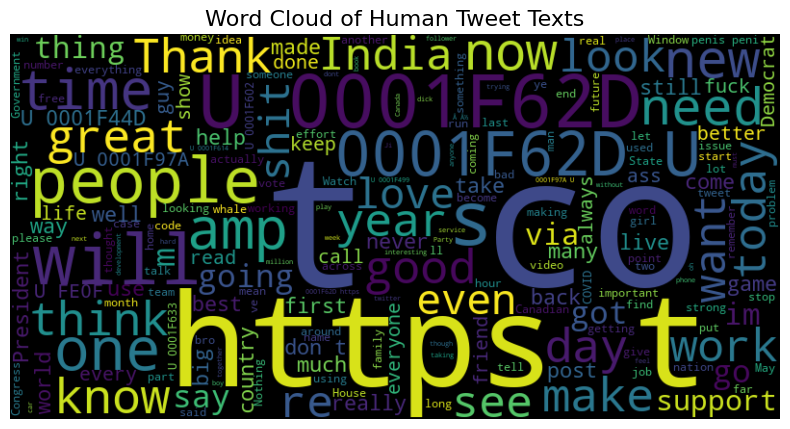

In [60]:
"""make this into a function"""
is_human_df = training_df[training_df['account.type'] == 'human']
human_tweets = ''.join(is_human_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(human_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Human Tweet Texts', fontsize=16)
plt.show()


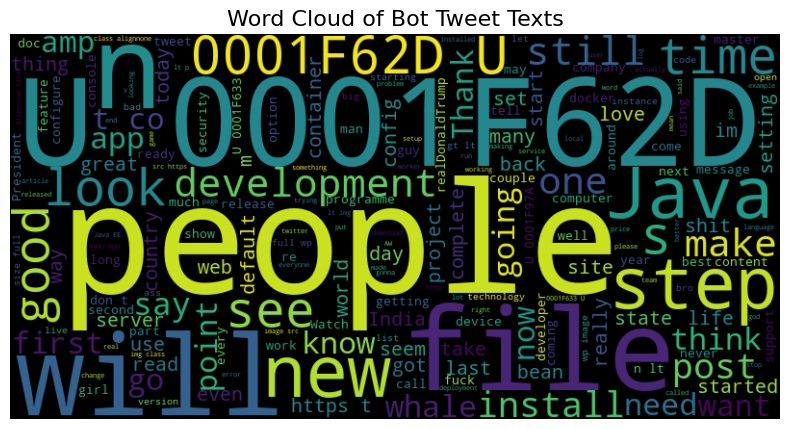

In [ ]:
is_bot_df = training_df[training_df['account.type'] == 'bot']
bot_tweets = ''.join(is_bot_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(bot_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Bot Tweet Texts', fontsize=16)
plt.show()

"""They share the most common emoji 😭 """

In [ ]:
"""TODO: make tidier, possibly add URL detection"""